In [14]:
import pyautogui as ag
import matplotlib.pyplot as plt
import numpy as np
from pynput.keyboard import Key, Controller
keyboard = Controller()
import time

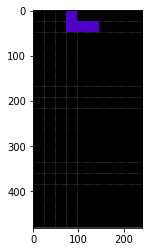

In [15]:
pox=700
poy=196
pw=96
ph=96
hox=324
hoy=196
hw=96
hh=96
box=430
boy=196
bw=242
bh=482
im=np.array(ag.screenshot(region=(box,boy,bw,bh)))
plt.imshow(im)

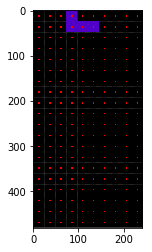

In [16]:
im2=im.copy()
bsqo=12
bgs=24
for i in range(20):
    for j in range(10):
        y=bsqo+bgs*i
        x=bsqo+bgs*j
        im2[y:y+3,x:x+3]=np.array([255,0,0])
plt.imshow(im2)

In [66]:

sqo=12
gs=24
'''S,L,J,I,O,Z,T'''
pc=dict()
thresh=30
pc['S']=((2,0),(2,1),(1,1),(1,2))
pc['Z']=((2,2),(2,1),(1,1),(1,0))
pc['O']=((1,1),(1,2),(2,1),(2,2))
pc['I']=((1,1),(1,2),(1,0),(1,3))
pc['J']=((1,0),(2,0),(2,1),(2,2))
pc['L']=((1,2),(2,0),(2,1),(2,2))
pc['T']=((1,1),(2,0),(2,1),(2,2))


poff=dict()

poff[('T',0)]=(3,4)
poff[('T',1)]=(3,5)
poff[('T',2)]=(3,4)
poff[('T',-1)]=(4,4)

poff[('I',0)]=(3,3)
poff[('I',1)]=(4,5)

poff[('O',0)]=(4,4)


poff[('S',0)]=(3,4)
poff[('S',1)]=(3,5)

poff[('Z',0)]=(3,4)
poff[('Z',1)]=(3,5)


poff[('J',0)]=(3,4)
poff[('J',1)]=(3,5)
poff[('J',2)]=(3,4)
poff[('J',-1)]=(4,4)

poff[('L',0)]=(3,4)
poff[('L',1)]=(3,5)
poff[('L',2)]=(3,4)
poff[('L',-1)]=(4,4)

prot=dict()

prot['T']=(0,1,2,-1)
prot['I']=(0,1)
prot['O']=(0,)
prot['S']=(0,1)
prot['Z']=(0,1)
prot['J']=(0,1,2,-1)
prot['L']=(0,1,2,-1)


protpos=dict()
protpos[('T',0)]=((0,1),(1,0),(1,1),(1,2))
protpos[('T',1)]=((0,1),(1,0),(1,1),(2,1))
protpos[('T',2)]=((1,1),(0,0),(0,1),(0,2))
protpos[('T',-1)]=((0,0),(1,0),(2,0),(1,1))


protpos[('I',0)]=((0,0),(0,1),(0,2),(0,3))
protpos[('I',1)]=((0,0),(1,0),(2,0),(3,0))

protpos[('O',0)]=((0,0),(1,0),(0,1),(1,1))


protpos[('S',0)]=((0,1),(1,0),(1,1),(0,2))
protpos[('S',1)]=((0,0),(1,0),(1,1),(2,1))

protpos[('Z',0)]=((0,1),(0,0),(1,1),(1,2))
protpos[('Z',1)]=((0,1),(1,0),(2,0),(1,1))


protpos[('J',0)]=((1,0),(0,0),(1,1),(1,2))
protpos[('J',1)]=((0,1),(2,0),(1,1),(2,1))
protpos[('J',2)]=((0,0),(0,1),(0,2),(1,2))
protpos[('J',-1)]=((0,0),(1,0),(2,0),(0,1))

protpos[('L',0)]=((1,0),(0,2),(1,1),(1,2))
protpos[('L',1)]=((0,1),(0,0),(1,1),(2,1))
protpos[('L',2)]=((0,0),(0,1),(0,2),(1,0))
protpos[('L',-1)]=((0,0),(1,0),(2,0),(2,1))
for k in protpos:
    protpos[k]=tuple(sorted(protpos[k],key=lambda x:10*x[1]+x[0]))
    #print(k, protpos[k])


psize=dict()
psize[('T',0)]=(3,2)
psize[('T',1)]=(2,3)
psize[('T',2)]=(3,2)
psize[('T',-1)]=(2,3)

psize[('I',0)]=(4,1)
psize[('I',1)]=(1,4)

psize[('O',0)]=(2,2)


psize[('S',0)]=(3,2)
psize[('S',1)]=(2,3)

psize[('Z',0)]=(3,2)
psize[('Z',1)]=(2,3)


psize[('J',0)]=(3,2)
psize[('J',1)]=(2,3)
psize[('J',2)]=(3,2)
psize[('J',-1)]=(2,3)

psize[('L',0)]=(3,2)
psize[('L',1)]=(2,3)
psize[('L',2)]=(3,2)
psize[('L',-1)]=(2,3)

hvals=[-4.500158825082766,
       3.4181268101392694,
       -3.2178882868487753,
       -9.348695305445199,
       -7.899265427351652,
       -3.3855972247263626]




def getnextpiece():
    im=np.array(ag.screenshot(region=(pox,poy,pw,ph)))
    piece=None
    for k,v in pc.items():
        check=True
        for y,x in v:
            if np.sum(im[sqo+gs*y,sqo+gs*x])<thresh:
                check=False
        if check:
            piece=k
            break
    return piece
def getheldpiece():
    im=np.array(ag.screenshot(region=(hox,hoy,hw,hh)))
    piece=None
    for k,v in pc.items():
        check=True
        for y,x in v:
            if np.sum(im[sqo+gs*y,sqo+gs*x])<thresh:
                check=False
        if check:
            piece=k
            break
    return piece
def getboard():
    im=np.array(ag.screenshot(region=(box,boy,bw,bh)))
    board=np.zeros((20,10),dtype=np.uint8)
    for i in range(1,20):
        for j in range(10):
            y=bsqo+bgs*i
            x=bsqo+bgs*j
            if np.sum(im[y,x])>thresh:
                board[i,j]=1
    #plt.imshow(board)
    return board
def press(key):
    keyboard.press(key)
    keyboard.release(key)
def rr():
    time.sleep(keystroke_delay)
    press('x')
def rl():
    time.sleep(keystroke_delay)
    press('z')
def r180():
    time.sleep(keystroke_delay)
    press('z')
    time.sleep(keystroke_delay)
    press('z')
def r0():
    pass
rfuncs=[r0,rl,r180,rr]
def hold():
    time.sleep(keystroke_delay)
    press('c')


In [67]:
def landheight(lh,ph):
    return lh+(ph/2)
def row_transitions(board):
    total=0
    for row in board:
        if 1 in row:
            state=row[0]
            for j in row:
                if j!=state:
                    total+=1
                    state=j
    return total
def col_transitions(board):
    total=0
    for col in board.T:
        state=col[0]
        for j in col:
            if j!=state:
                total+=1
                state=j
    return total
def num_holes(board):
    total=0
    for col in board.T:
        foundPiece=False
        for j in col:
            if j==1:
                foundPiece=True
            elif foundPiece:
                total+=1
    return total
def column_heights(board):
    col_heights=list()
    for col in board.T:
        val=0
        for ind in range(len(col)):
            if col[ind]==1:
                val=20-ind
                break
        col_heights.append(val)
    return col_heights
def num_wells(board):
    col_heights=column_heights(board)
    well_sum=0
    for i in range(1,9):
        well_height=max(min(col_heights[i-1],col_heights[i+1])-col_heights[i],0)
        well_sum+=int(well_height*(well_height+1)/2)
    l_well_height=max(col_heights[1]-col_heights[0],0)
    well_sum+=int(l_well_height*(l_well_height+1)/2)
    r_well_height=max(col_heights[-2]-col_heights[-1],0)
    well_sum+=int(r_well_height*(r_well_height+1)/2)
    return well_sum
def heuristic(board,landing_height,piece_height,rows_eliminated):
    ret=0
    
    ret+=hvals[0]*landheight(landing_height,piece_height)
    ret+=hvals[1]*rows_eliminated
    ret+=hvals[2]*row_transitions(board)
    ret+=hvals[3]*col_transitions(board)
    ret+=hvals[4]*num_holes(board)
    ret+=hvals[5]*num_wells(board)
    return ret
def clearlines(board):
    deleted_rows=list()
    for row in range(len(board))[::-1]:
        if np.sum(board[row])==10:
            deleted_rows.append(row)
    board=np.delete(board,deleted_rows,axis=0)
    board=np.concatenate([np.zeros((len(deleted_rows),10)),board],axis=0)
    return board, len(deleted_rows)

In [68]:
#plt.imshow(getboard())
#print(num_wells(getboard()))
#print(getboard())
# board=np.concatenate([np.eye(10),np.eye(10)],axis=0)
# board[[0,1,2,3,4,16,17,18,19]]=1
# print(board)
# print(clearlines(board))

In [69]:
#print(tuple(sorted(((0,2),(0,1),(1,2),(1,1)),key=lambda x:10*x[1]+x[0])))

In [70]:
def drop_piece(board,piece,rotation,lh,mph,loff):
    nb=board.copy()
    piece_coords=protpos[(piece,rotation)]
    offset_x=loff
    offset_y=19-lh-mph
    for ycoord,xcoord in piece_coords:
        nb[offset_y+ycoord,offset_x+xcoord]=1
    return nb


def placePiece(pieces,board):
    maxpiece=pieces[0]
    maxloff=0
    maxrotation=0
    maxheuristic=-9999
    cleared_lines=0
    ch=column_heights(board)
    for piece in pieces:
        for rotation in prot[piece]:
            pwidth,pheight=psize[(piece,rotation)]
            pheightbycol=[0 for _ in range(pwidth)]
            for tup in protpos[(piece,rotation)]:
                pheightbycol[tup[1]]=tup[0]
            max_piece_height=max(pheightbycol)
            for loff in range(10-pwidth+1):
                max_x=-1
                max_col_height=-1
                
                for ind in range(loff,loff+pwidth):
                    if pheightbycol[ind-loff]+ch[ind]>max_col_height:
                        max_col_height=pheightbycol[ind-loff]+ch[ind]
                        max_x=ind-loff
                landing_height=ch[loff+max_x]-(max_piece_height-pheightbycol[max_x])
                newboard=drop_piece(board,piece,rotation,landing_height,max_piece_height,loff)
                newboard,rows_eliminated=clearlines(newboard)
                h=heuristic(newboard,landing_height,pheight,rows_eliminated)
                if h>maxheuristic:
                    maxpiece=piece
                    maxloff=loff
                    maxheuristic=h
                    maxrotation=rotation
                    cleared_lines=rows_eliminated
    return maxpiece, maxloff, maxrotation, cleared_lines 
def sendKeystrokes(piece,loff,rotation):
    rfuncs[rotation]()
    o1,o2=poff[(piece,rotation)]
    if loff>o1:
        for i in range(loff-o1):
            time.sleep(keystroke_delay)
            press(Key.right)
    else:
        for i in range(o1-loff):
            time.sleep(keystroke_delay)
            press(Key.left)
    time.sleep(keystroke_delay)
    press(Key.space)

S 1 8


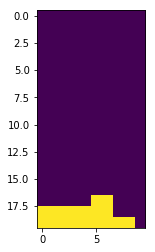

In [94]:
board=np.zeros((20,10))
#board[18:,:9]=1
#board=np.concatenate([np.zeros((10,10)),np.eye(10)],axis=0)
board=np.array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 
                [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 
                [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 
                [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 
                [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 
                [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 
                [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 
                [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 
                [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 
                [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 
                [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 
                [0, 0, 0, 0, 0, 1, 1, 0, 0, 0], 
                [1, 1, 1, 1, 1, 1, 1, 0, 0, 0],
                [1, 1, 1, 1, 1, 1, 1, 1, 1, 0]],dtype=np.int)
#print(board)





piece,loff,rotation=placePiece(['Z','S'],board)
w,h=psize[(piece,rotation)]
piece_board=np.zeros((max(h,2),max(w,2)))
for tup in protpos[(piece,rotation)]:
    piece_board[tup[0],tup[1]]=1
plt.gca().invert_yaxis()
plt.imshow(board)
print(piece, rotation, loff)

In [74]:
# for k in pc:
#     for rot in prot[k]:
#         print(k, rot)
#         board=np.concatenate([np.zeros((10,10)),np.eye(10)],axis=0)
#         board[18,:9]=1
#         board=np.zeros((20,10))
#         ch=column_heights(board)

#         #print(board)
#         piece=k
#         rotation=rot
#         loff=0
#         pwidth,pheight=psize[(piece,rotation)]
#         pheightbycol=[0 for _ in range(pwidth)]
#         for tup in protpos[(piece,rotation)]:
#             pheightbycol[tup[1]]=tup[0]
#         max_piece_height=max(pheightbycol)
#         max_x=-1
#         max_col_height=-1

#         for ind in range(loff,loff+pwidth):
#             if pheightbycol[ind-loff]+ch[ind]>max_col_height:
#                 max_col_height=pheightbycol[ind-loff]+ch[ind]
#                 max_x=ind-loff
#         landing_height=ch[loff+max_x]-(max_piece_height-pheightbycol[max_x])
#         newboard=drop_piece(board,piece,rotation,landing_height,max_piece_height,loff)
#         newboard,rows_eliminated=clearlines(newboard)
#         # print('')
#         # print(rows_eliminated)
#         # print('')
#         print(newboard)

S 0
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
 [1. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]
S 1
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 

In [95]:
start_delay=2.5
delay=0.1
keystroke_delay=0.1
def main():
    held=None
    cur=None
    time.sleep(4)
    press(Key.f4)
    time.sleep(start_delay)
    cur=getnextpiece()
    hold()
    time.sleep(delay)
    held=getheldpiece()
    nex=getnextpiece()
    bd=getboard()
    total_lines=0
    
    piece,loff,rotation,lines_cleared=placePiece([cur],bd)
    sendKeystrokes(piece,loff,rotation)
    
    while total_lines<40:
        time.sleep(keystroke_delay)
        cur=nex
        nex=getnextpiece()
        piece,loff,rotation,lines_cleared=placePiece([cur,held],bd)
        total_lines+=lines_cleared
        if piece==held:
            hold()
            held=cur
        sendKeystrokes(piece,loff,rotation)
            
        
    
        
    

In [30]:
main()

In [12]:
time.sleep(4)
sendKeystrokes('J',7,2)
#sendKeystrokes('Z',4,1)